In [1]:
import requests, pandas as pd, numpy as np
from matplotlib import pyplot as plt
import re
from bs4 import BeautifulSoup
import seaborn a

In [2]:
url = 'https://www.basketball-reference.com/awards/mvp.html'

In [3]:
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [4]:
#soup

In [5]:
lst = soup.find('div', {'id':'content'}).findAll('td', {'data-stat':'team_id'})

In [6]:
#lst

In [7]:
page_lst = [x.find('a')['href'] for x in lst]

In [8]:
#page_lst

In [9]:
n=34
del page_lst[-n:]

In [10]:
#page_lst

In [11]:
#link = page_lst[0]
#print(link)
#url = "https://www.basketball-reference.com" + link
#print(url)
#r1 = requests.get(url)
#root = BeautifulSoup(r1.content)
#elt = root.find('div', {'data-template':'Partials/Teams/Summary'}).findAll('p')
#for i in range(len(elt)):
#    print(elt[i].getText())

In [12]:
wp_lst = []
s_lst = []
for link in page_lst:
    #print(link)
    url = 'https://www.basketball-reference.com' + str(link)
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    #print(url)
    elt = soup.find('div', {'data-template':'Partials/Teams/Summary'}).findAll('p')
    win_per = elt[0].getText()
    if url != 'https://www.basketball-reference.com/teams/PHO/1993.html':
        srs = elt[4].getText()
    else:
        srs = elt[3].getText()
    #print(srs)
    wp_lst.append(win_per)
    s_lst.append(srs)

In [13]:
wp_lst = [x.split() for x in wp_lst]
wp_lst = [x[1] for x in wp_lst]

In [14]:
s_lst = [x.split() for x in s_lst]
s_lst = [x[1] for x in s_lst]

In [15]:
year_lst = [x for x in reversed(range(1980, 2023))]

In [16]:
#print(wp_lst)
#print(s_lst)
#print(year_lst)

In [17]:
s_lst = [float(x) for x in s_lst]

In [18]:
#print(s_lst)

In [19]:
wp_lst = [x[:-1] for x in wp_lst]

In [20]:
#print(wp_lst)

In [21]:
wp_lst = [x.split('-') for x in wp_lst]

In [22]:
#print(wp_lst)

In [23]:
wp_lst = [int(y) for x in wp_lst for y in x]

In [24]:
#print(wp_lst)

In [25]:
lst = []
for x in range(0, len(wp_lst), 2):
    #print("x: " + str(x) + " | x + 1: " + str(x + 1))
    win = wp_lst[x]
    loss = wp_lst[x+1]
    g = win + loss
    lst.append(round(((win / g)*100),2))
wp_lst = lst

In [26]:
#print(wp_lst)

In [27]:
link_str = ""
for link in page_lst:
    link_str = link_str + str(link) + "\n"

In [28]:
#print(link_str)

In [29]:
p = re.compile('/teams/(.*).html')

In [30]:
res = p.findall(link_str)

In [31]:
team_lst = [x[:3] for x in res]

In [32]:
#print(team_lst)

In [33]:
team_lst.insert(0, 'DEN')
#print(team_lst)
wp_lst.insert(0, 58.54)
#print(wp_lst)
s_lst.insert(0, 2.15)
#print(s_lst)
#print(year_lst)

In [34]:
cols=['Team', 'Year', 'Win %', 'SRS']
df = pd.DataFrame(columns=cols)

In [35]:
df['Team'] = team_lst
df['Year'] = year_lst
df['Win %'] = wp_lst
df['SRS'] = s_lst

In [36]:
df

,Team,Year,Win %,SRS
0,DEN,2022,58.54,2.15
1,DEN,2021,65.28,4.82
2,MIL,2020,76.71,9.41
3,MIL,2019,73.17,8.04
4,HOU,2018,79.27,8.21
5,OKC,2017,57.32,1.14
6,GSW,2016,89.02,10.38
7,GSW,2015,81.71,10.01
8,OKC,2014,71.95,6.66
9,MIA,2013,80.49,7.03


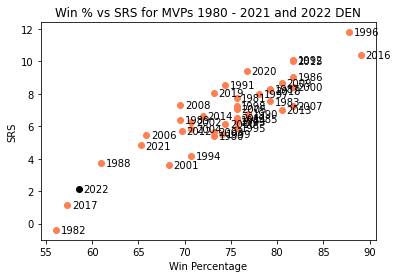

In [37]:
color_dict = {0:'k'}
[color_dict.setdefault(i, 'coral') for i in range(1,43)]
for i, year in enumerate (year_lst):
    plt.scatter(wp_lst[i], s_lst[i], c=color_dict[i])
    plt.text(wp_lst[i]+0.5, s_lst[i]-0.2, year)

plt.xlabel('Win Percentage')
plt.ylabel('SRS')  
plt.title("Win % vs SRS for MVPs 1980 - 2021 and 2022 DEN")
plt.savefig('mvp_scatter.png')  
plt.show()
plt.close()